## **APPLYING LEIDEN ALGORITHM**

In [1]:
import numpy as np
import re
import os
import leidenalg
import igraph as ig
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.io
from sklearn.neighbors import NearestNeighbors 
dataset='sunny'   #change dataset here !!!

In [2]:
#change directory
os.chdir("/home/hades/codes/leiden/cold/")
#Applying Leiden algorythm on "partitions.txt" and generating "partitions.npy"
directory="/home/hades/codes/leiden/cold/"
#from igraph import graph_from_adjacency_matrix
adjmatrix=np.loadtxt('/home/hades/codes/leiden/cold/sim_matrix_%s.txt' %dataset)
M=np.ndarray.tolist(adjmatrix)
G = ig.Graph.Weighted_Adjacency(M,mode='UNDIRECTED',attr="weight", loops=True)
#g = ig.Graph(directed=False)
#g.add_vertices(G.nodes())
#g.add_edges(G.edges())

part = leidenalg.find_partition(G, leidenalg.ModularityVertexPartition , weights='weight');
print (part)

#saving clusters to file
np.save('/home/hades/codes/leiden/cold/partitions_%s' %dataset,part)



Clustering with 1598 elements and 14 clusters
[ 0] 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
     147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160,
     161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174,
     175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188,
     189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202,
     203, 204, 205, 206, 207, 208, 209, 210, 211, 490, 491, 492, 493, 494,
     495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508,
     509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522,
     523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536,
     537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550,
     551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564,
     565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578,
     579, 580, 581, 582, 583, 584, 585, 586, 587, 588,

## **Splitting the generated partitions (leiden output) further based on sequence.**

In [3]:
## os.chdir("/home/hades/codes/leiden/cold/")
#part=np.load('partitions_%s.npy' %dataset)
clusters=len(part)
print ("Total clusters generated from LEIDEN algorithm :", clusters)
k=0
part_final=[[]]
#print (part)
for x in range(0,clusters):
    nodes=len(part[x])
    flag=0 # number of new clusters in each old cluster
    l=0
    #part_final.append([])
#    print (part_final)
    for y in range(0,nodes):
        if y==0:
            flag=1
        if (part[x][y]-5<part[x][y-1]  and flag==0 ):# or (flag==1):
            part_final[k].append(part[x][y])
#            print ("in cluster ",k,"saving ",part[x][y])
            flag=0
        else:
            k+=1
            part_final.append([])
            part_final[k].append(part[x][y])
            #print (part[x][y],"is out")
            flag=0


np.save('/home/hades/codes/leiden/cold/partitions_splitted',part_final)
n_DivClusters=k
n_DivClusters+=1
for i in range(0,k) :
    print ("Cluster ",i," contains : ",part_final[i])

Total clusters generated from LEIDEN algorithm : 14
Cluster  0  contains :  []
Cluster  1  contains :  [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211]
Cluster  2  contains :  [490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 5

## **Reading X Y Z odometry from KeyFrameTrajectory.txt**

1598
start


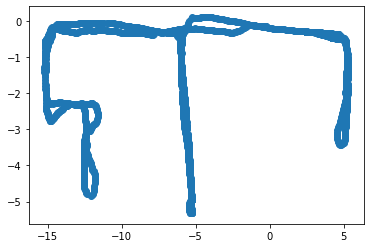

In [4]:
#part=np.load('/home/hades/codes/leiden/cold/partitions_splitted.npy')
#print part[1]
#odo = open("/home/hades/Downloads/Datasets/seq1_%s1/odom_scans/odom.tdf" %dataset, "r") 

#odo.close()
#odo = open("/home/hades/Downloads/Datasets/seq1_%s1/odom_scans/odom.tdf" %dataset, "r") 
#print(odo.readlines(1)[10:20])
import glob
files0=glob.glob("/home/hades/Downloads/Datasets/seq1_%s1/std_cam/*.jpeg"%dataset)
files0.sort(reverse=False);
#print(files0)
l=len(files0)
x=np.zeros((l,1),dtype=float)
y=np.zeros((l,1),dtype=float)
z=np.zeros((l,1),dtype=float)

print(l)
print('start')
for i in range(0,l):
  #  print(i)
#    p= str(odo.readline())
    #x[i]=float(p[19:30])
    txyz=re.split("_",files0[i])
   # print('txyz',txyz)
    x[i]=float(txyz[3][1:])
    y[i]=float(txyz[4][1:])
 #   z[i]=float(txyz[5][1:])
    #print(x[i])
    #print(y[i])
 #   print(z[i])
    #print('\n')

#odo.close()
plt.scatter(x,y, label='True Position') # draw odometry

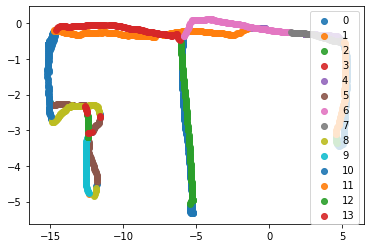

In [5]:
fig, ax = plt.subplots()
for i in range(0,len(part)) :
    scatter = ax.scatter(x[part[i][:]],y[part[i][:]],alpha=0.9, label='%s'%i,cmap='Dark2',)
    ax.legend(loc='best')

In [6]:
import sys
sys.version
x.any is None


False

### **Plot from division clustering**

In [7]:

cluster = AgglomerativeClustering(n_clusters=None, affinity='l2',distance_threshold=2.1,compute_full_tree=True, linkage='complete') #sunny 8 clusters
#cluster = AgglomerativeClustering(n_clusters=8, affinity='l2', linkage='complete') #night 5 clusters
f=cluster.fit_predict(x,y)  
n_metric_Clusters=max(f)+1
print(n_metric_Clusters)
print(f)
len(f)
#2.1

14
[1 1 1 ... 3 3 3]


1598

Plot from metric clustering

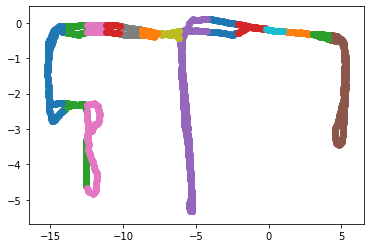

In [8]:


plt.figure(2) 
for i in range(0,n_metric_Clusters) :
    plt.scatter(x[f==i],y[f==i], label='True Position',cmap='Dark2')

    

Generating metric cluster arrays

**CLUSTERING USING EUCLΙDΕAN DISTANCE**

Avg XY for Div_clusters:

Avg XY for Metric_clusters:

**CLUSTERING USING OVERLAP**

In [9]:

mCluster=[]
for i in range(0,n_metric_Clusters):
    #mCluster[i]=len(np.argwhere(f==i))
    #mCluster=np.empty((len(np.argwhere(f==i)),1),int)
    mCluster.append(np.argwhere(f==i))
#print(mCluster[:][:])
s=0
for i in range(0,n_metric_Clusters):
    s=len(mCluster[i])+s
s

1598

In [10]:
Y=[]
X=[]
for i in range(0,n_metric_Clusters):
    tX=0
    tY=0
    X.append([])
    Y.append([])
    for j in range(0,len(mCluster[i])):
        tX+=x[mCluster[i][j][0]][0]
        tY+=y[mCluster[i][j][0]][0]
    X[i]=(tX/j)
    Y[i]=(tY/j)

    #print(X,Y)
a=[]
for i in range(0,len(X)):
    a.append([X[i],Y[i]])

Y=[]
X=[]
for i in range(0,len(part_final)):
    tY=0
    X.append([])
    Y.append([])
    for j in range(0,len(part_final[i])):
        tX+=x[mCluster[i][j][0]][0]
        tY+=y[mCluster[i][j][0]][0]
    X[i]=(tX/j)
    Y[i]=(tY/j)

    print(X,Y)
a=[]
for i in range(0,len(X)):
    a.append([X[i],Y[i]])

In [11]:
neigh = NearestNeighbors(n_neighbors=1)
neigh.fit(a) 
counter=0
met=[]
best=0
vote=[0]*len(X)
final_Clusters=[]

final_Clusters=list([[] for i in range(0,len(X))])
for i in range(0,len(part_final)):
    met=[]
    
    for j in range(0,len(part_final[i])):
        met.append(neigh.kneighbors(np.append(x[part_final[i][j]],y[part_final[i][j]]).reshape(1, -1))[1][0][0])
        vote[met[j]]+=1
        #print(met[j])
    print(vote)
    print(np.argmax(np.array(vote))  )   
    final_Clusters[np.argmax(np.array(vote))].extend(part_final[i])
    vote=[0]*len(X)            


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0
[0, 0, 0, 0, 0, 79, 0, 0, 0, 0, 0, 0, 0, 0]
5
[0, 0, 0, 0, 111, 0, 0, 0, 20, 0, 0, 0, 0, 0]
4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 0, 0, 0]
10
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0]
10
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
6
[0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0]
6
[0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0]
6
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 65, 0, 0, 0]
10
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
6
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
6
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
6
[33, 0, 5, 11, 0, 0, 0, 18, 25, 0, 32, 15, 0, 38]
13
[0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0]
5
[0, 0, 0, 0, 130, 0, 0, 0, 22, 0, 0, 0, 0, 0]
4
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0]
10
[0, 0, 0, 0, 0, 0, 0, 22, 42, 0, 21, 25, 0, 41]
8
[0, 86, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 42, 0]
1
[0, 0, 0, 10, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0]
3
[0, 0, 0, 0, 0, 0, 15, 0, 0, 0, 0, 0, 0, 0]
6
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
6
[0, 0, 0, 0, 0, 0, 31, 0,

In [12]:

s=0
final_Clusters = [x for x in final_Clusters if x != []]
for i in range(0,len(final_Clusters)):
    s=len(final_Clusters[i])+s
    print('cluster ',i)
    print(final_Clusters[i])
print(s)

len(final_Clusters)



cluster  0
[389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489]
cluster  1
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 1

11

11


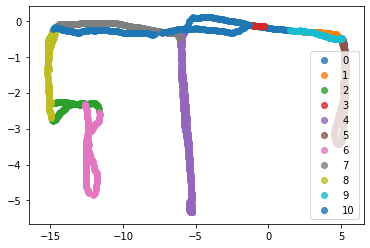

In [13]:
fig, ax = plt.subplots()
 

print(len(final_Clusters))
#final_Clusters.pop() # to teleyte
for i in range(0,len(final_Clusters)) :
    scatter = ax.scatter(x[final_Clusters[i][:]],y[final_Clusters[i][:]],alpha=0.8, label='%s'%i,cmap='Dark2',)
    ax.legend(loc='best')

**AFTER**

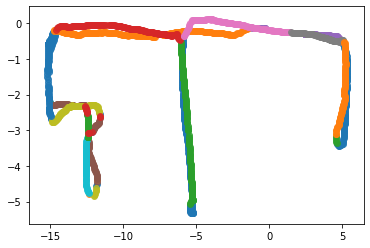

In [14]:

for i in range(0,len(part)) :
    
    plt.scatter(x[part[i][:]],y[part[i][:]],alpha=0.8, label='True Position',cmap='Dark2')

**BEFORE**

In [15]:
np.save('final_Clusters_%s' %dataset , final_Clusters)